# Economic Indicators Exploratory Data Analysis

This notebook contains descriptive analysis of the panel dataset for Latin American countries from 2003-2023.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Import custom helper functions
import sys
sys.path.append("/Users/lnt/Desktop/Lumos/project/src/utils")
from helpers import plot_missing

## Load the panel dataset

In [2]:
# Load the processed panel dataset
panel = pd.read_csv("../../data/processed/panel_2003_2023.csv")

# Display basic information
print(f"Dataset shape: {panel.shape}")
panel.head()

Dataset shape: (357, 11)


,Country,Year,gdpgrowth,gini,ineq,gii,ruleoflaw,lnpovhead,lnpovhead215,lngovt,lntradeopen
0,Mexico,2003,1.185545,NaN,NaN,NaN,-0.377903,NaN,NaN,2.442177,3.906013
1,Mexico,2004,3.565441,50.3,NaN,NaN,-0.409910,2.928524,2.104134,2.399365,3.971058
2,Mexico,2005,2.113247,50.9,NaN,NaN,-0.382990,2.933857,2.174752,2.404801,3.980852
3,Mexico,2006,4.805014,49.7,NaN,NaN,-0.472546,2.772589,1.856298,2.388042,4.016061
4,Mexico,2007,2.077864,NaN,NaN,NaN,-0.542932,NaN,NaN,2.393147,4.029958


## Missing Data Analysis

Let's examine missing data in our poverty indicators. The visualization will color differently the two poverty line variables:
- `lnpovhead`: Poverty headcount ratio at $3.65 a day (2017 PPP)
- `lnpovhead215`: Poverty headcount ratio at $2.15 a day (2017 PPP)

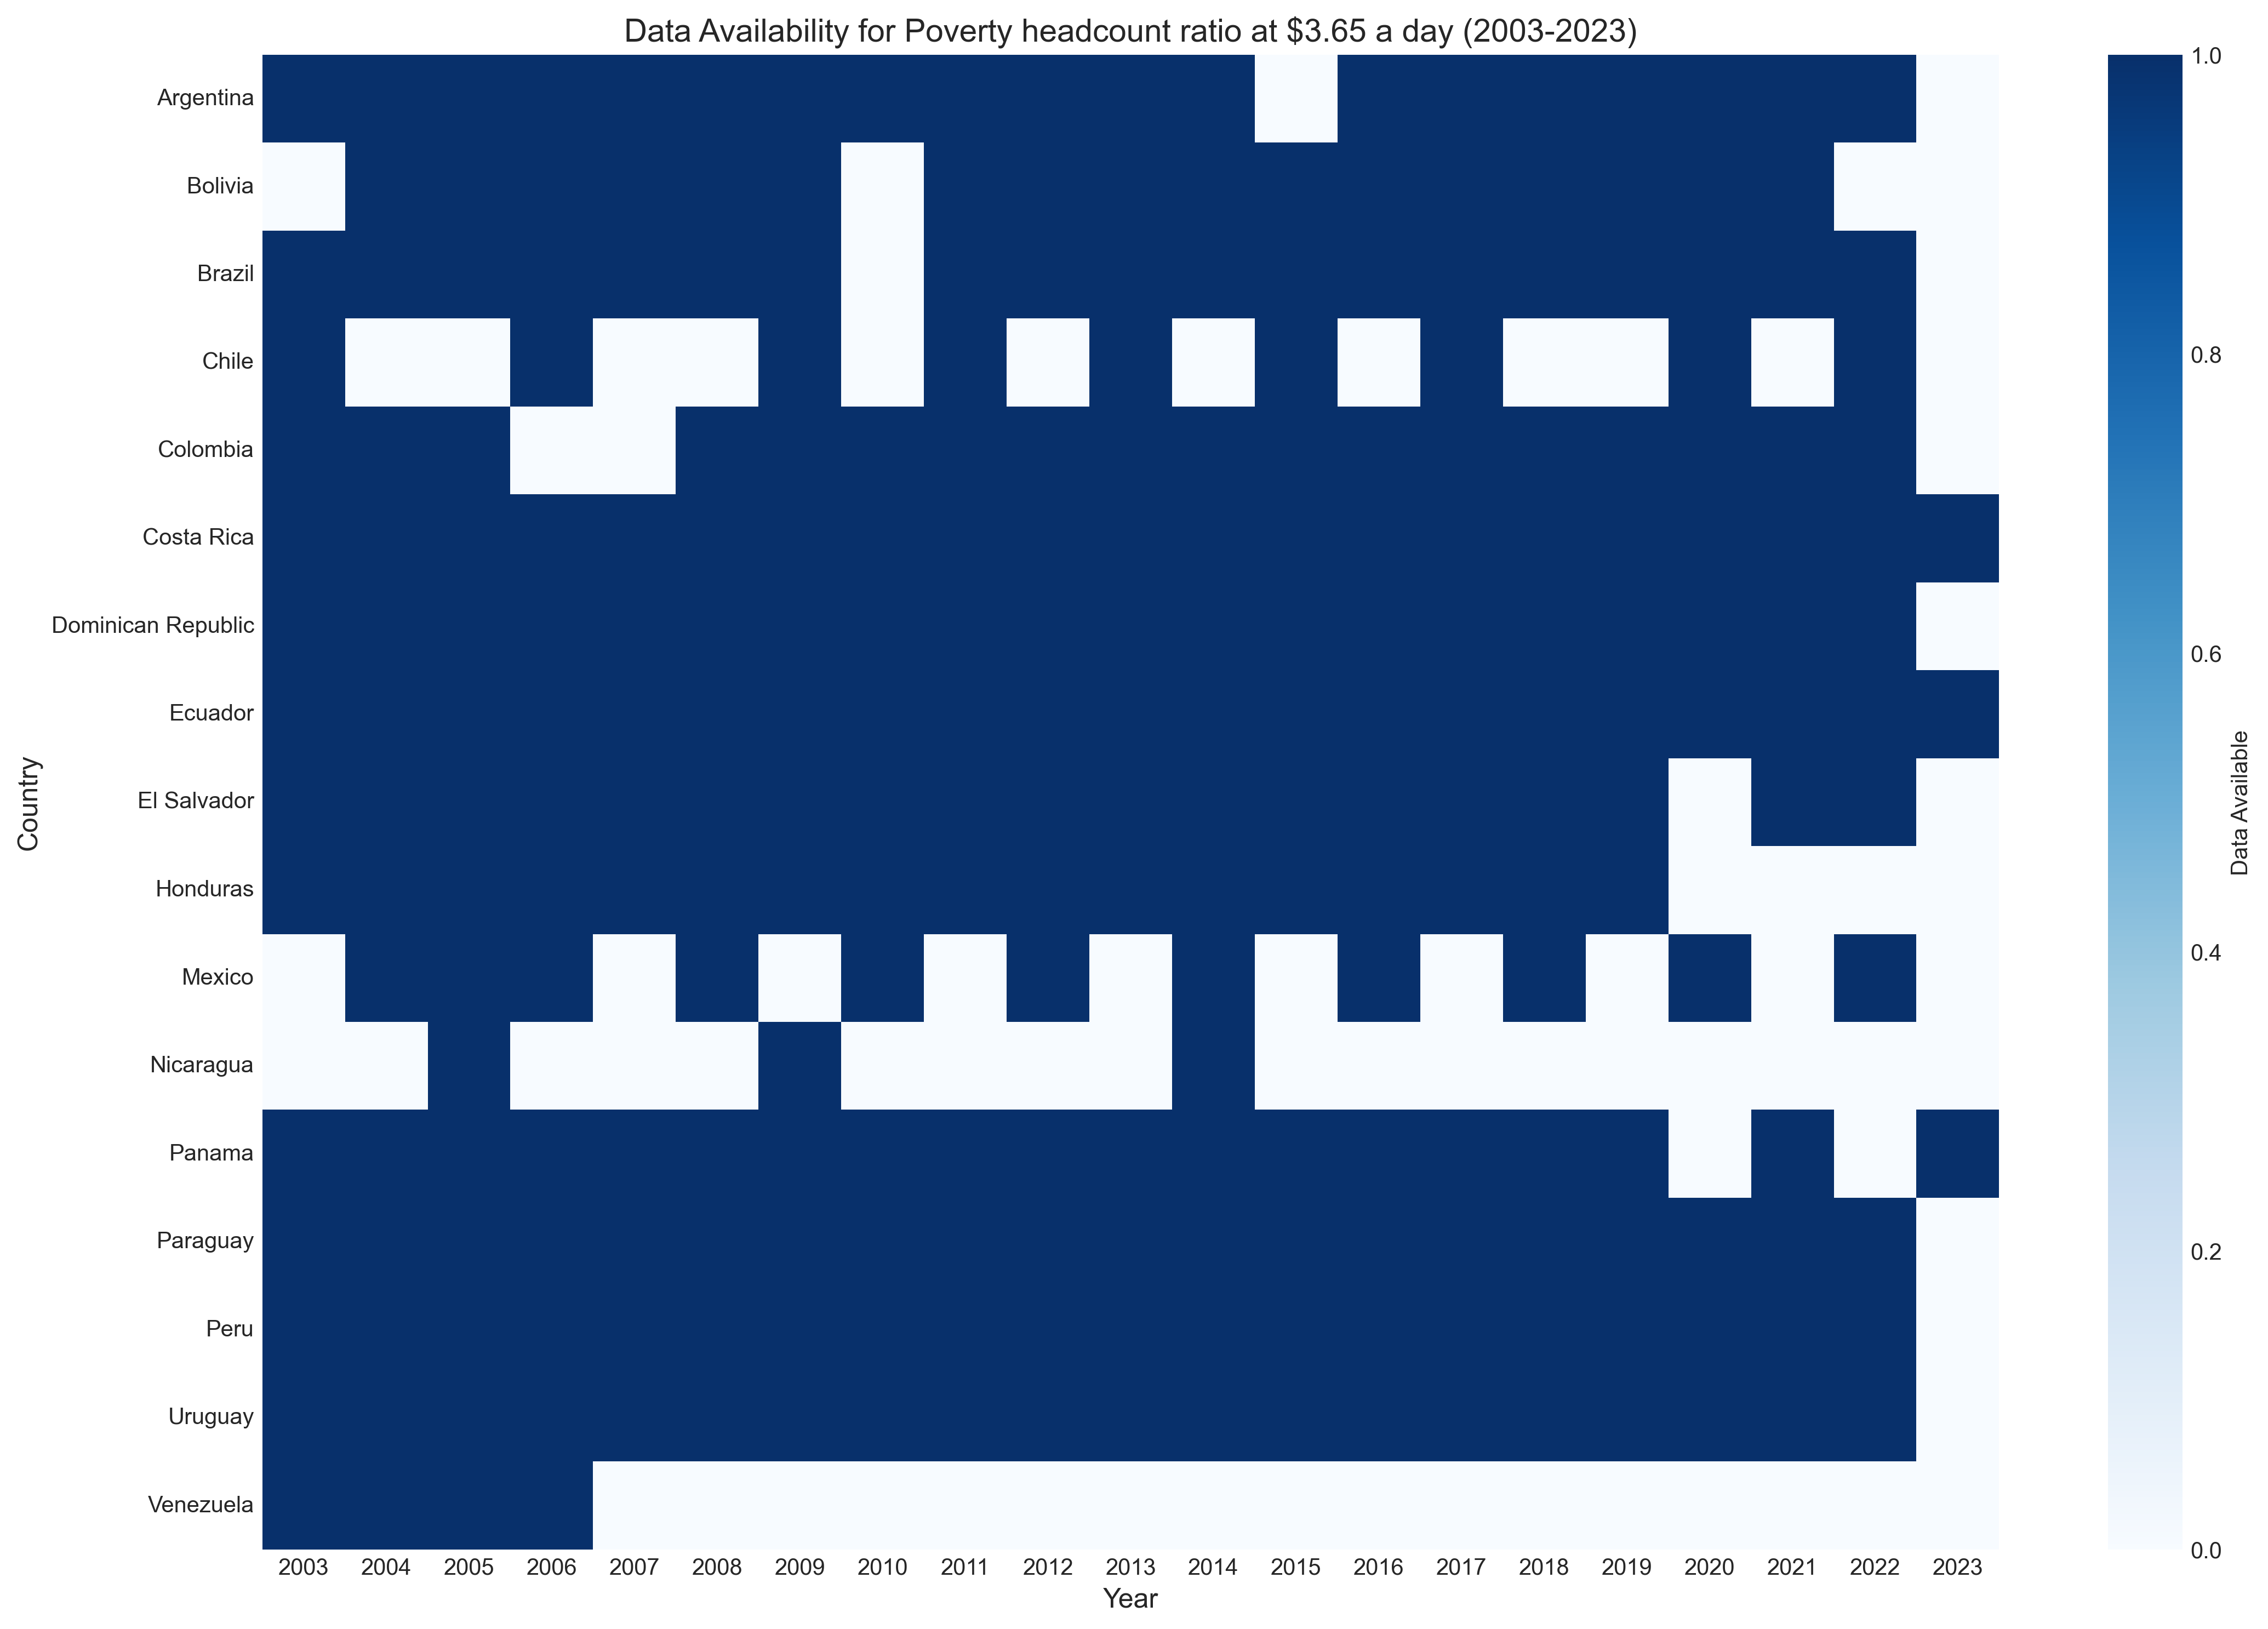

In [5]:
# Visualize missing data for 'lnpovhead'
plot_missing(panel[['Country', 'Year', 'lnpovhead']],
             "../../reports/figures/missing_poverty_lnpovhead.png")

# Display the image in the notebook
from IPython.display import Image
Image("../../reports/figures/missing_poverty_lnpovhead.png")

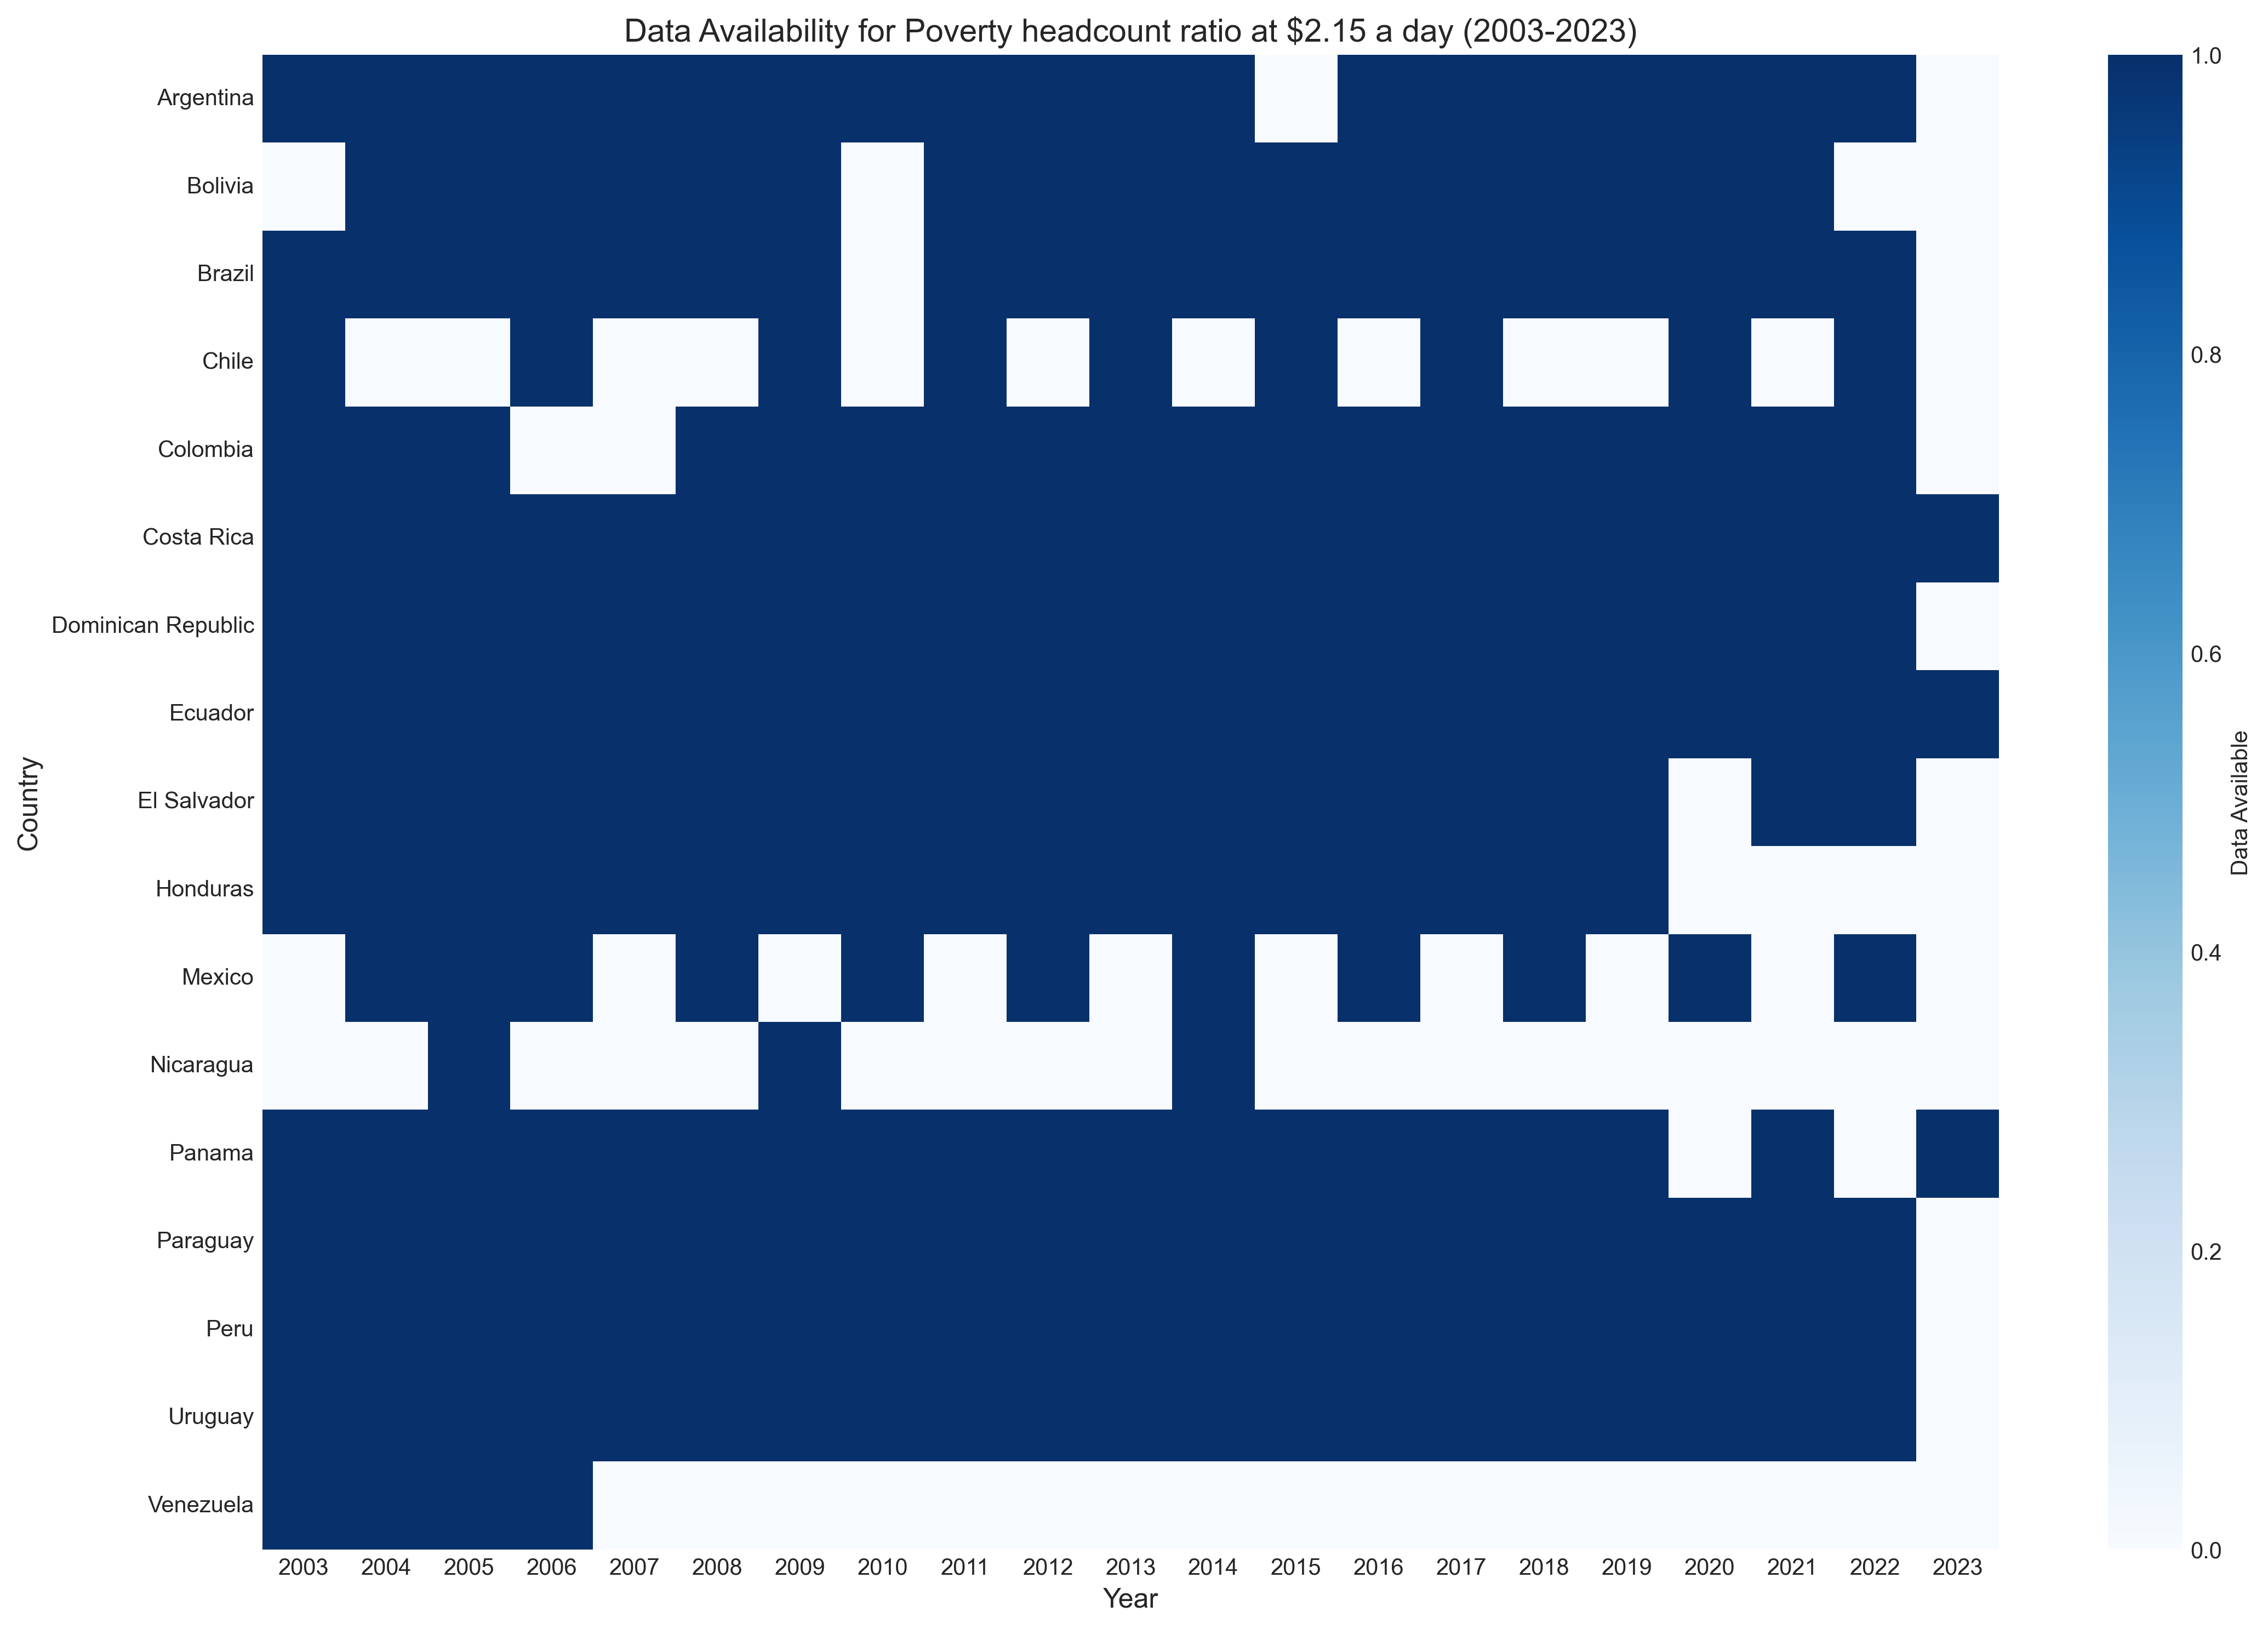

In [6]:
# Visualize missing data for 'lnpovhead215'
plot_missing(panel[['Country', 'Year', 'lnpovhead215']],
             "../../reports/figures/missing_poverty_lnpovhead215.png")

# Display the image in the notebook
Image("../../reports/figures/missing_poverty_lnpovhead215.png")

## Overall Missing Data

In [7]:
# Visualize missing data for all variables
plot_missing(panel, "../../reports/figures/missing_all.png")

# Display the image in the notebook
Image("../../reports/figures/missing_all.png")

FileNotFoundError: No such file or directory: '../../reports/figures/missing_all.png'

FileNotFoundError: No such file or directory: '../../reports/figures/missing_all.png'

<IPython.core.display.Image object>

## Summary Statistics

In [ ]:
# Generate summary statistics
panel.describe()

## Distribution of Key Variables

In [ ]:
# Plot histograms for key variables
numeric_cols = panel.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Year']

fig, axes = plt.subplots(nrows=len(numeric_cols)//2 + len(numeric_cols)%2, ncols=2, figsize=(14, 3*len(numeric_cols)//2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(panel[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.savefig("../../reports/figures/variable_distributions.png", dpi=300, bbox_inches='tight')
plt.show()